In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Grid World
## Value Iteration

In [2]:
def generate_Pij(grid_size,action): #[-1:up,+1:down][1:right,-1:left]
    P_ij=np.zeros((10,10,100))
    for i in range(grid_size):
        for j in range(grid_size):
            P_ij_temp=np.zeros((grid_size+2,grid_size+2))
            #for k in range(grid_size):
                #for l in range(grid_size):
            P_ij_temp[int(i+1+action[i][j][0])][int(j+1+action[i][j][1])]=0.8
            P_ij_temp[int(i+1+int(not (action[i][j][0])))][int(j+1+int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[int(i+1-action[i][j][0])][int(j+1-action[i][j][1])]=0.2/3
            P_ij_temp[int(i+1-int(not (action[i][j][0])))][int(j+1-int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[1,:]+=P_ij_temp[0,:]
            P_ij_temp[:,1]+=P_ij_temp[:,0]
            P_ij_temp[-2,:]+=P_ij_temp[-1,:]
            P_ij_temp[:,-2]+=P_ij_temp[:,-1]
            P_ij_gridsize=P_ij_temp[1:-1,1:-1]
            #P_ij_gridsize=P_ij_gridsize.reshape(grid_size*grid_size)
            P_ij[:,:,grid_size*i+j]=P_ij_gridsize
    return P_ij

grid_size=10
up_action=np.zeros((grid_size,grid_size,2))
up_action[:,:,0]=-1
up_action[:,:,1]=0
up_P_ij=generate_Pij(10,up_action.astype(int)) 

down_action=np.zeros((grid_size,grid_size,2))
down_action[:,:,0]=1
down_action[:,:,1]=0
down_P_ij=generate_Pij(10,down_action.astype(int)) 

left_action=np.zeros((grid_size,grid_size,2))
left_action[:,:,0]=0
left_action[:,:,1]=-1
left_P_ij=generate_Pij(10,left_action.astype(int)) 

right_action=np.zeros((grid_size,grid_size,2))
right_action[:,:,0]=0
right_action[:,:,1]=1
right_P_ij=generate_Pij(10,right_action.astype(int)) 


In [58]:
#######################
niter=30
goal=9
in_gr=90 # coordinate of Gray wormhole IN when grid is reshaped from 10 x 10 to 100
in_or=7 # coordinate of Orange wormhole IN when grid is reshaped from 10 x 10 to 100

# coordinates of Gray wormhole OUT when grid is reshaped from 10 x 10 to 100
out_gr_1=32
out_gr_2=42
out_gr_3=52
out_gr_4=62
# coordinate of Orange wormhole OUT when grid is reshaped from 10 x 10 to 100
out_or_1=87

g=np.zeros(10*10)
g[goal]=10
g=np.reshape(g,(100,1))
J=np.zeros((100,1))
alpha=0.7
act_arr=[]

J_arr=[]
action_arr=[]

J_up=np.zeros(10*10)
J_down=np.zeros(10*10)
J_right=np.zeros(10*10)
J_left=np.zeros(10*10)

for i in range(niter):


    for state in range(100):
        up=np.sum(g*np.reshape(up_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(up_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        down=np.sum(g*np.reshape(down_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(down_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        right=np.sum(g*np.reshape(right_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(right_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        left=np.sum(g*np.reshape(left_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(left_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        J_up[state]=up
        J_down[state]=down
        J_right[state]=right
        J_left[state]=left

    J=np.vstack((J_up,J_down))
    J=np.vstack((J,J_right))
    J=np.vstack((J,J_left))
    act=np.argmax(J,axis=0) # up:0 down:1 right:2 left:3
    J=np.max(J,axis=0)
    act_arr.append(act)

    J[9]=0 #goal cost is always 0

    # Gray Wormholes
    gray_wormhole_arr=[J[out_gr_1],J[out_gr_2],J[out_gr_3],J[out_gr_4]]
    J[in_gr]=np.random.choice(gray_wormhole_arr,1,p=[1/4,1/4,1/4,1/4]) 

    #Orange Wormhole
    J[in_or]=J[out_or_1]

    #Terminal State
    J[goal]=0
    # Because for Gray wormhole IN we have 0.25 probab of getting in one of the OUT
    J_arr.append(J)
    action_arr.append(act)

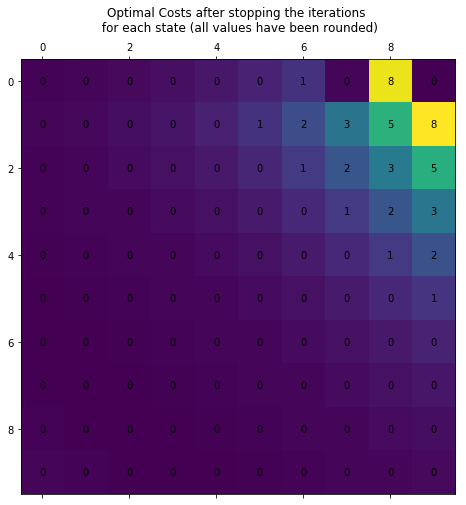

In [59]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = int(JN[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal Costs after stopping the iterations \n for each state (all values have been rounded)')
plt.show()

### Explanation of policy obtained
Value Iteration: All the actions around the Goal1 point into the goal.

None of the arrows point into Orange IN as it leads us far away from the goal.

All the actions point into Gray IN as it takes us closer towards Goal1


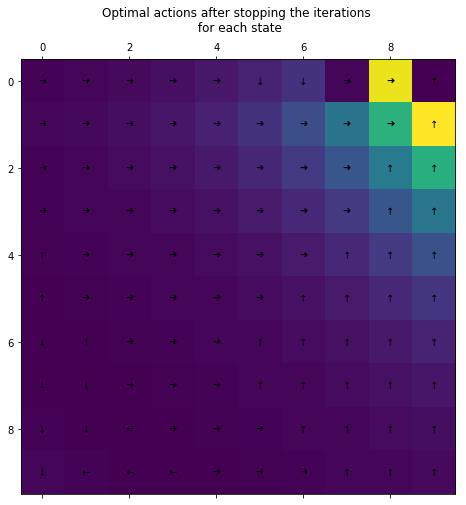

In [62]:
arrow={0:'↑',1:'↓',2:'➜',3:'←'}

# to print the arrows pointing along the optimal actions in that state
arrow_arr=[]
for i in range(len(act)):
    arrow_arr.append(arrow[act[i]])
    
arrow_arr=np.reshape(np.array(arrow_arr),(10,10))
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = (arrow_arr[j,i])
        
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal actions after stopping the iterations \n for each state')
plt.show()


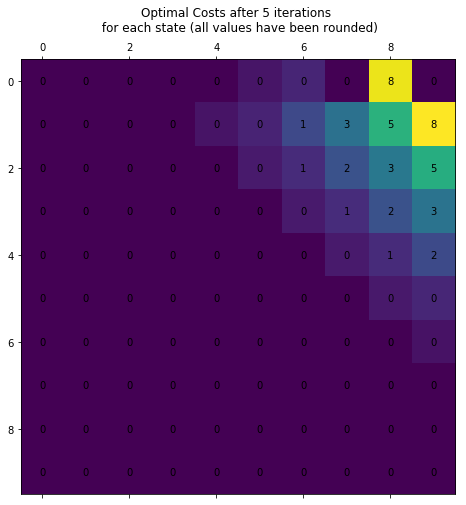

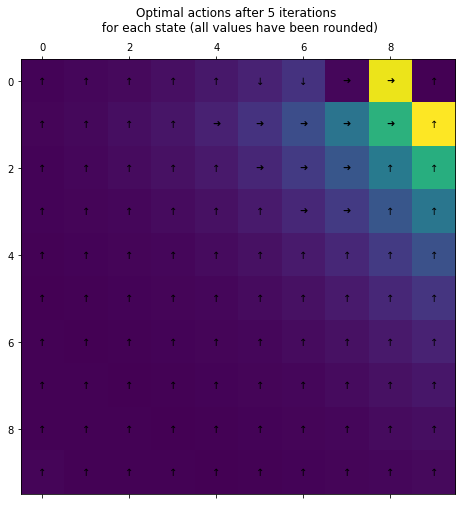

In [21]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
J_arr=np.array(J_arr)
JN=np.reshape(np.array(J_arr[5,:]),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = int(JN[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal Costs after 5 iterations \n for each state (all values have been rounded)')
plt.show()


arrow={0:'↑',1:'↓',2:'➜',3:'←'}

act_a=np.array(act_arr)
act=np.reshape(act_a[5,:],(100))
# to print the arrows pointing along the optimal actions in that state
arrow_arr=[]
for i in range(len(act)):
    arrow_arr.append(arrow[act[i]])
    
arrow_arr=np.reshape(np.array(arrow_arr),(10,10))
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = (arrow_arr[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal actions after 5 iterations \n for each state)')
plt.show()



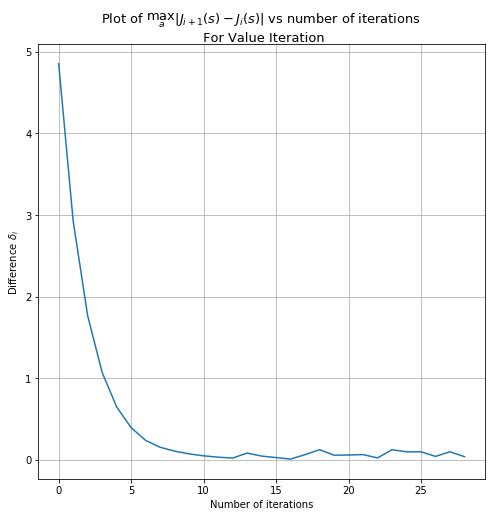

In [22]:
max_arr=[]
J_arr=np.array(J_arr)
for i in range(niter-1):
    max_arr.append(np.max(np.abs(J_arr[i+1]-J_arr[i])))
    
plt.plot(max_arr)
plt.grid()
plt.title('Plot of $\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Value Iteration',fontsize=13)
plt.xlabel('Number of iterations')
plt.ylabel('Difference $\delta_i$')
plt.show()

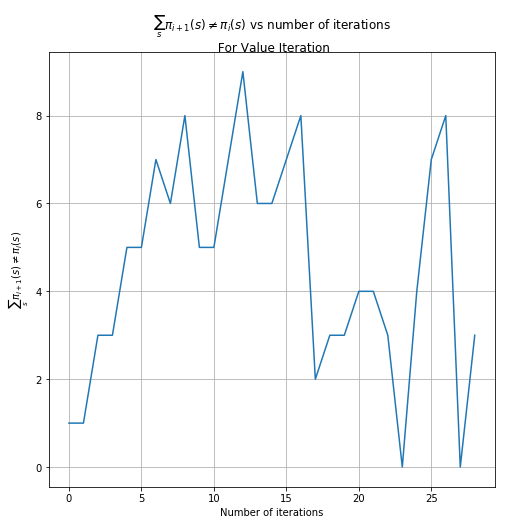

In [23]:
num_neq_pi=[]
pi=np.array(act_arr)
for i in range(niter-1):
    a=np.where(pi[i,:]!=pi[i+1,:])
    #print(len(a[0]))
    num_neq_pi.append(len(a[0]))
plt.plot(num_neq_pi)
plt.grid()
plt.title(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s) $ vs number of iterations'+' \n For Value Iteration')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s)$')
plt.show()

### Policy Iteration

In [9]:
niter=30
grid_size=10
alpha=0.7
PI=np.zeros((grid_size,grid_size,4)) #initialise with all UP's
goal=9
in_gr=90 # coordinate of Gray wormhole IN when grid is reshaped from 10 x 10 to 100
in_or=7 # coordinate of Orange wormhole IN when grid is reshaped from 10 x 10 to 100

# coordinates of Gray wormhole OUT when grid is reshaped from 10 x 10 to 100
out_gr_1=32
out_gr_2=42
out_gr_3=52
out_gr_4=62
# coordinate of Orange wormhole OUT when grid is reshaped from 10 x 10 to 100
out_or_1=87

def generate_Pij(grid_size,action): #[-1:up,+1:down][1:right,-1:left]
    # generates the transition probability matrix for each of the state given an action
    P_ij=np.zeros((10,10,100))
    for i in range(grid_size):
        for j in range(grid_size):
            P_ij_temp=np.zeros((grid_size+2,grid_size+2))
            #for k in range(grid_size):
                #for l in range(grid_size):
            P_ij_temp[int(i+1+action[i][j][0])][int(j+1+action[i][j][1])]=0.8
            P_ij_temp[int(i+1+int(not (action[i][j][0])))][int(j+1+int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[int(i+1-action[i][j][0])][int(j+1-action[i][j][1])]=0.2/3
            P_ij_temp[int(i+1-int(not (action[i][j][0])))][int(j+1-int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[1,:]+=P_ij_temp[0,:]
            P_ij_temp[:,1]+=P_ij_temp[:,0]
            P_ij_temp[-2,:]+=P_ij_temp[-1,:]
            P_ij_temp[:,-2]+=P_ij_temp[:,-1]
            P_ij_gridsize=P_ij_temp[1:-1,1:-1]
            #P_ij_gridsize=P_ij_gridsize.reshape(grid_size*grid_size)
            P_ij[:,:,grid_size*i+j]=P_ij_gridsize
    return P_ij
# initialise all actions as UP ie [-1,0] for all 100 states
action=np.zeros((grid_size,grid_size,2))
action[:,:,0]=-1
action[:,:,1]=0
#generate_Pij(10,action.astype(int)) 

# single stage cost
g=np.zeros(grid_size*grid_size)
g[goal]=10

up_action=np.zeros((grid_size,grid_size,2))
up_action[:,:,0]=-1
up_action[:,:,1]=0
up_P_ij=generate_Pij(10,up_action.astype(int)) 

down_action=np.zeros((grid_size,grid_size,2))
down_action[:,:,0]=1
down_action[:,:,1]=0
down_P_ij=generate_Pij(10,down_action.astype(int)) 

left_action=np.zeros((grid_size,grid_size,2))
left_action[:,:,0]=0
left_action[:,:,1]=-1
left_P_ij=generate_Pij(10,left_action.astype(int)) 

right_action=np.zeros((grid_size,grid_size,2))
right_action[:,:,0]=0
right_action[:,:,1]=1
right_P_ij=generate_Pij(10,right_action.astype(int)) 
act_arr1=[]
J_arr1=[]
P_ij=np.zeros((grid_size*grid_size,grid_size*grid_size))
for i in (range(niter)):
    act_arr1.append(action)
    
    generated_P_ij=generate_Pij(grid_size,action.astype(int))

    for k in range(grid_size*grid_size):
        P_ij[k,:]=np.reshape(generated_P_ij[:,:,k],(grid_size*grid_size))

    # solving the linear equations ie applying T_pi operator
    IP=np.linalg.inv(np.identity(grid_size*grid_size)-alpha*P_ij) #(I-alpha*P_ij)
    g_pi=np.dot(P_ij,g)
    g_pi[goal]=0
    J=np.dot(IP,g_pi)

    # Gray Wormholes
    gray_wormhole_arr=[J[out_gr_1],J[out_gr_2],J[out_gr_3],J[out_gr_4]]
    J[in_gr]=np.random.choice(gray_wormhole_arr,1,p=[1/4,1/4,1/4,1/4]) 

    #Orange Wormhole
    J[in_or]=J[out_or_1]

    #Terminal State
    J[goal]=0
    J_arr1.append(J)
    # Applying T operator
    TJ=np.zeros(grid_size*grid_size)
    T_action_up_down=np.zeros(grid_size*grid_size) # to store up down actions
    T_action_right_left=np.zeros(grid_size*grid_size) # to store right left actions
    new_action=np.zeros((grid_size,grid_size,2))
    for state in range(grid_size*grid_size):

        up=np.sum(g*np.reshape(up_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(up_P_ij[:,:,state],(grid_size**2))*J)
        down=np.sum(g*np.reshape(down_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(down_P_ij[:,:,state],(grid_size**2))*J)
        right=np.sum(g*np.reshape(right_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(right_P_ij[:,:,state],(grid_size**2))*J)
        left=np.sum(g*np.reshape(left_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(left_P_ij[:,:,state],(grid_size**2))*J)

        # min over actions
        TJ_temp=np.max([up,down,right,left])
        TJ[state]=TJ_temp
        min_action=np.argmax([up,down,right,left])

        if min_action==0: # up action
            T_action_up_down[state]=-1
            T_action_right_left[state]=0
        elif min_action==1: # down action
            T_action_up_down[state]=1
            T_action_right_left[state]=0
        elif min_action==2: # right action
            T_action_up_down[state]=0
            T_action_right_left[state]=1
        elif min_action==3: # left action
            T_action_up_down[state]=0
            T_action_right_left[state]=-1

    new_action[:,:,0]=np.reshape(T_action_up_down,(grid_size,grid_size))
    new_action[:,:,1]=np.reshape(T_action_right_left,(grid_size,grid_size))
    if np.array_equal(J,TJ):
        print('Converged within %d iterations'%i)
        print('Breaking')
        break
        pass
    action=new_action #update the action


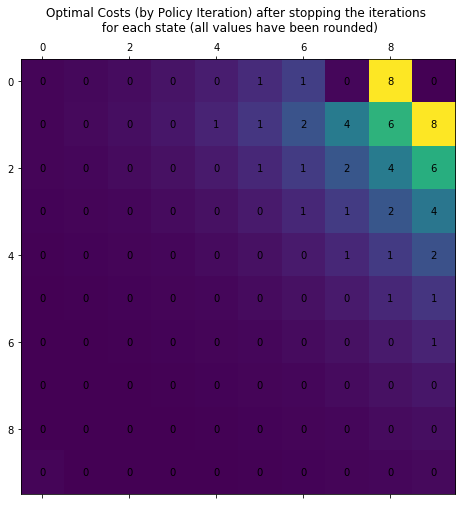

In [10]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(J,(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = int(np.floor(JN[j,i]))
        if c==10:
            c=8
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal Costs (by Policy Iteration) after stopping the iterations \n for each state (all values have been rounded)')
plt.show()

### Explanation of policy obtained
Policy Iteration: All the actions around the Goal1 point into the goal.

None of the arrows point into Orange IN as it leads us far away from the goal.

All the actions point into Gray IN as it takes us closer towards Goal1



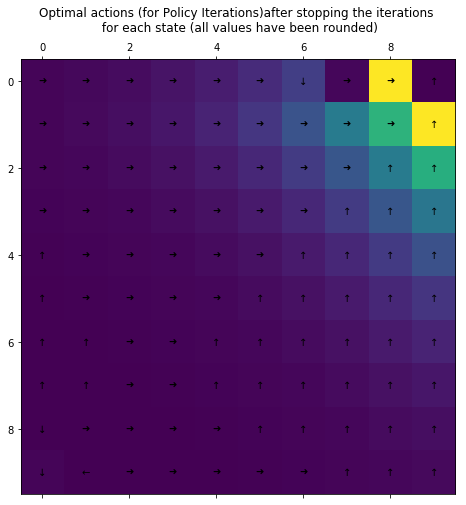

In [11]:
def create_action_matrix(action):
    arrow={0:'↑',1:'➜',2:'↓',3:'←'}
    arrow_arr=[]
    for i in range(10):
        for j in range(10):
            if action[i,j,0]==-1: # up
                arrow_arr.append(arrow[0])
            elif action[i,j,0]==1: #down
                arrow_arr.append(arrow[2])
            elif action[i,j,1]==-1: #left
                arrow_arr.append(arrow[3])
            elif action[i,j,1]==1: #right
                arrow_arr.append(arrow[1])
    return (np.reshape(arrow_arr,(10,10)))

act1=create_action_matrix(action)


# to print the arrows pointing along the optimal actions in that state
    
arrow_arr=np.reshape(np.array(act1),(10,10))
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = (act1[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal actions (for Policy Iterations)after stopping the iterations \n for each state (all values have been rounded)')
plt.show()



In [12]:
J_arr1=np.array(J_arr1)
act_arr1=np.array(act_arr1)

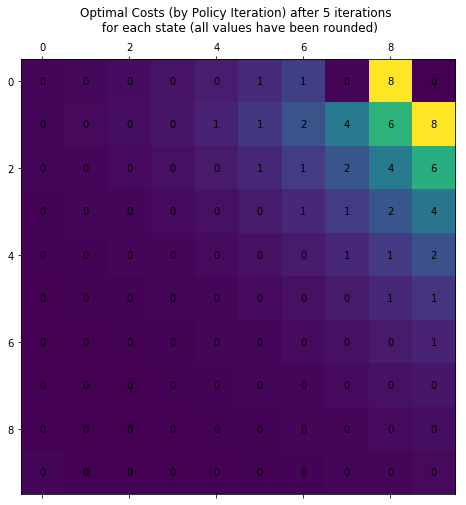

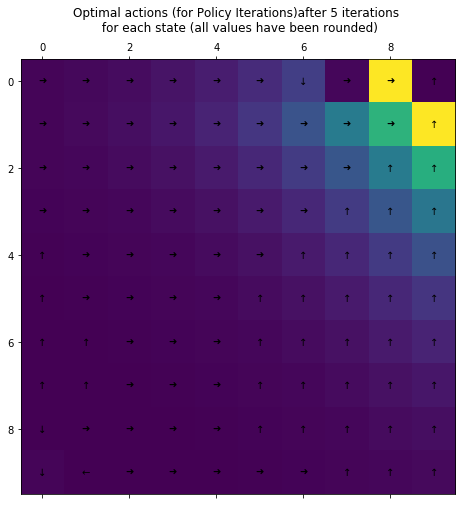

In [13]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(J_arr1[5,:],(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = int(np.floor(JN[j,i]))
        if c==10:
            c=8
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal Costs (by Policy Iteration) after 5 iterations \n for each state (all values have been rounded)')
plt.show()

act2=create_action_matrix(act_arr1[5,:,:,:])


# to print the arrows pointing along the optimal actions in that state
    
arrow_arr=np.reshape(np.array(act2),(10,10))
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = (act2[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal actions (for Policy Iterations)after 5 iterations \n for each state (all values have been rounded)')
plt.show()





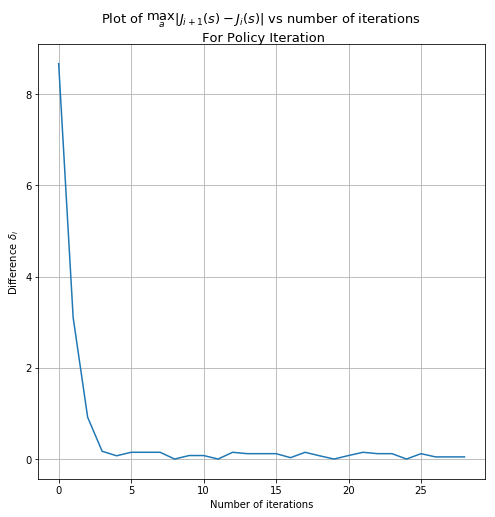

In [14]:
max_arr=[]
J_arr1=np.array(J_arr1)
for i in range(niter-1):
    max_arr.append(np.max(np.abs(J_arr1[i+1]-J_arr1[i])))
    
plt.plot(max_arr)
plt.grid()
plt.title('Plot of $\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Policy Iteration',fontsize=13)
plt.xlabel('Number of iterations')
plt.ylabel('Difference $\delta_i$')
plt.show()




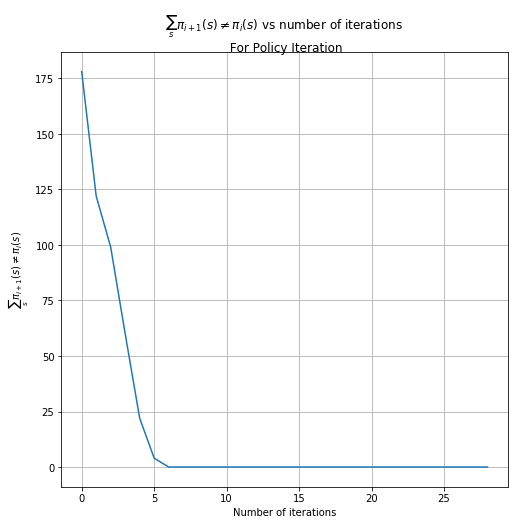

In [15]:
num_neq_pi=[]

pi=np.array(act_arr1)
for i in range(niter-1):
    a=np.where(pi[i,:,:,:]!=pi[i+1,:,:,:])
    #print(len(a[0]))
    num_neq_pi.append(len(a[0]))
plt.plot(num_neq_pi)
plt.grid()
plt.title(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s) $ vs number of iterations'+' \n For Policy Iteration')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s)$')
plt.show()

In [24]:
J_arr.shape

(30, 100)

In [17]:
J_arr1.shape

(30, 100)

Comparing Policy iteration and value iteration:

With the three plots given below it is evident that policy iteration converges faster. This is because we are updating the policies after each iteration giving us a different J(s) whereas in value iteration the convergence is theoretically after infinite steps. 

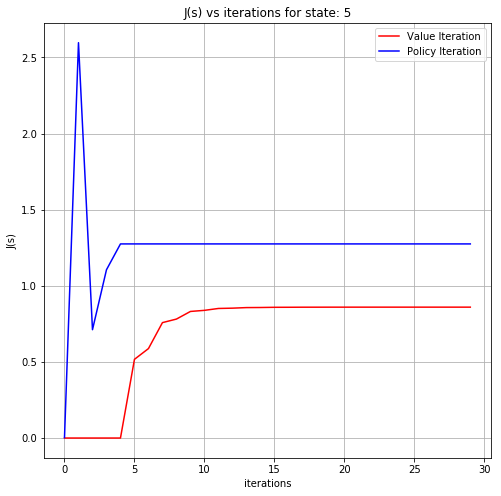

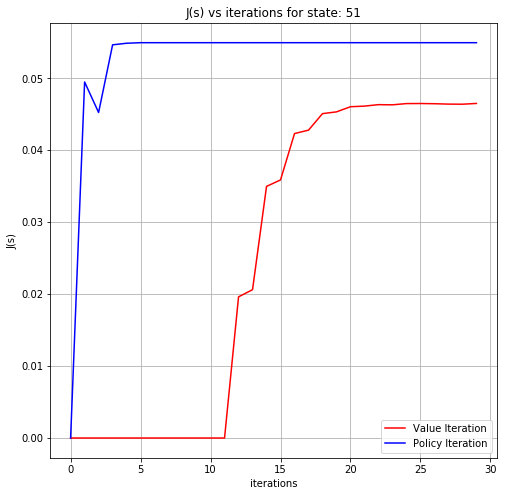

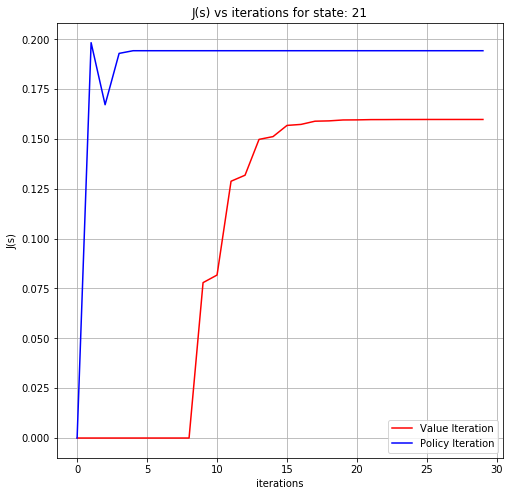

In [36]:
k=18
def plot_curve(k):
    plt.plot(J_arr[:,k],'r',label='Value Iteration')
    plt.plot(J_arr1[:,k],'b',label='Policy Iteration')
    plt.grid()
    plt.title('J(s) vs iterations for state: %d'%k)
    plt.xlabel('iterations')
    plt.ylabel('J(s)')
    plt.legend()
    plt.show()
plot_curve(5)
plot_curve(51)
plot_curve(21)

#### Goal 2

In [37]:
#######################
niter=30
goal=93

g=np.zeros(10*10)
g[goal]=10
g=np.reshape(g,(100,1))
J=np.zeros((100,1))
alpha=0.7
act_arr=[]

J_arr=[]
action_arr=[]

J_up=np.zeros(10*10)
J_down=np.zeros(10*10)
J_right=np.zeros(10*10)
J_left=np.zeros(10*10)

for i in range(niter):


    for state in range(100):
        up=np.sum(g*np.reshape(up_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(up_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        down=np.sum(g*np.reshape(down_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(down_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        right=np.sum(g*np.reshape(right_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(right_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        left=np.sum(g*np.reshape(left_P_ij[:,:,state],(100,1)))+alpha*np.sum(np.reshape(left_P_ij[:,:,state],(100,1))*np.reshape(J,(100,1)))
        J_up[state]=up
        J_down[state]=down
        J_right[state]=right
        J_left[state]=left

    J=np.vstack((J_up,J_down))
    J=np.vstack((J,J_right))
    J=np.vstack((J,J_left))
    act=np.argmax(J,axis=0) # up:0 down:1 right:2 left:3
    J=np.max(J,axis=0)
    act_arr.append(act)

    J[9]=0 #goal cost is always 0

    # Gray Wormholes
    gray_wormhole_arr=[J[out_gr_1],J[out_gr_2],J[out_gr_3],J[out_gr_4]]
    J[in_gr]=np.random.choice(gray_wormhole_arr,1,p=[1/4,1/4,1/4,1/4]) 

    #Orange Wormhole
    J[in_or]=J[out_or_1]

    #Terminal State
    J[goal]=0
    # Because for Gray wormhole IN we have 0.25 probab of getting in one of the OUT
    J_arr.append(J)
    action_arr.append(act)

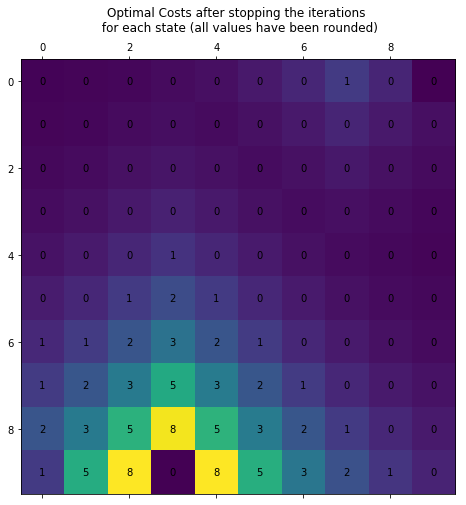

In [38]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = int(JN[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal Costs after stopping the iterations \n for each state (all values have been rounded)')
plt.show()

### Explanation of policy obtained
Value Iteration: All the actions around the Goal2 point into the goal.

None of the arrows point into Gray IN as it leads us far away from the goal.

All the actions point into Orange IN as it takes us closer towards Goal1



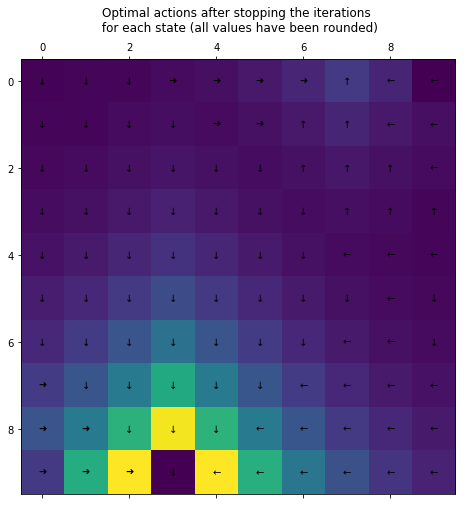

In [39]:
arrow={0:'↑',1:'↓',2:'➜',3:'←'}

# to print the arrows pointing along the optimal actions in that state
arrow_arr=[]
for i in range(len(act)):
    arrow_arr.append(arrow[act[i]])
    
arrow_arr=np.reshape(np.array(arrow_arr),(10,10))
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = (arrow_arr[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal actions after stopping the iterations \n for each state (all values have been rounded)')
plt.show()



In [40]:
niter=30
grid_size=10
alpha=0.7
PI=np.zeros((grid_size,grid_size,4)) #initialise with all UP's
goal=93
in_gr=90 # coordinate of Gray wormhole IN when grid is reshaped from 10 x 10 to 100
in_or=7 # coordinate of Orange wormhole IN when grid is reshaped from 10 x 10 to 100

# coordinates of Gray wormhole OUT when grid is reshaped from 10 x 10 to 100
out_gr_1=32
out_gr_2=42
out_gr_3=52
out_gr_4=62
# coordinate of Orange wormhole OUT when grid is reshaped from 10 x 10 to 100
out_or_1=87

def generate_Pij(grid_size,action): #[-1:up,+1:down][1:right,-1:left]
    # generates the transition probability matrix for each of the state given an action
    P_ij=np.zeros((10,10,100))
    for i in range(grid_size):
        for j in range(grid_size):
            P_ij_temp=np.zeros((grid_size+2,grid_size+2))
            #for k in range(grid_size):
                #for l in range(grid_size):
            P_ij_temp[int(i+1+action[i][j][0])][int(j+1+action[i][j][1])]=0.8
            P_ij_temp[int(i+1+int(not (action[i][j][0])))][int(j+1+int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[int(i+1-action[i][j][0])][int(j+1-action[i][j][1])]=0.2/3
            P_ij_temp[int(i+1-int(not (action[i][j][0])))][int(j+1-int(not (action[i][j][1])))]=0.2/3
            P_ij_temp[1,:]+=P_ij_temp[0,:]
            P_ij_temp[:,1]+=P_ij_temp[:,0]
            P_ij_temp[-2,:]+=P_ij_temp[-1,:]
            P_ij_temp[:,-2]+=P_ij_temp[:,-1]
            P_ij_gridsize=P_ij_temp[1:-1,1:-1]
            #P_ij_gridsize=P_ij_gridsize.reshape(grid_size*grid_size)
            P_ij[:,:,grid_size*i+j]=P_ij_gridsize
    return P_ij
# initialise all actions as UP ie [-1,0] for all 100 states
action=np.zeros((grid_size,grid_size,2))
action[:,:,0]=-1
action[:,:,1]=0
#generate_Pij(10,action.astype(int)) 

# single stage cost
g=np.zeros(grid_size*grid_size)
g[goal]=10

up_action=np.zeros((grid_size,grid_size,2))
up_action[:,:,0]=-1
up_action[:,:,1]=0
up_P_ij=generate_Pij(10,up_action.astype(int)) 

down_action=np.zeros((grid_size,grid_size,2))
down_action[:,:,0]=1
down_action[:,:,1]=0
down_P_ij=generate_Pij(10,down_action.astype(int)) 

left_action=np.zeros((grid_size,grid_size,2))
left_action[:,:,0]=0
left_action[:,:,1]=-1
left_P_ij=generate_Pij(10,left_action.astype(int)) 

right_action=np.zeros((grid_size,grid_size,2))
right_action[:,:,0]=0
right_action[:,:,1]=1
right_P_ij=generate_Pij(10,right_action.astype(int)) 
act_arr1=[]
J_arr1=[]
P_ij=np.zeros((grid_size*grid_size,grid_size*grid_size))
for i in (range(niter)):
    act_arr1.append(action)
    
    generated_P_ij=generate_Pij(grid_size,action.astype(int))

    for k in range(grid_size*grid_size):
        P_ij[k,:]=np.reshape(generated_P_ij[:,:,k],(grid_size*grid_size))

    # solving the linear equations ie applying T_pi operator
    IP=np.linalg.inv(np.identity(grid_size*grid_size)-alpha*P_ij) #(I-alpha*P_ij)
    g_pi=np.dot(P_ij,g)
    g_pi[goal]=0
    J=np.dot(IP,g_pi)

    # Gray Wormholes
    gray_wormhole_arr=[J[out_gr_1],J[out_gr_2],J[out_gr_3],J[out_gr_4]]
    J[in_gr]=np.random.choice(gray_wormhole_arr,1,p=[1/4,1/4,1/4,1/4]) 

    #Orange Wormhole
    J[in_or]=J[out_or_1]

    #Terminal State
    J[goal]=0
    J_arr1.append(J)
    # Applying T operator
    TJ=np.zeros(grid_size*grid_size)
    T_action_up_down=np.zeros(grid_size*grid_size) # to store up down actions
    T_action_right_left=np.zeros(grid_size*grid_size) # to store right left actions
    new_action=np.zeros((grid_size,grid_size,2))
    for state in range(grid_size*grid_size):

        up=np.sum(g*np.reshape(up_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(up_P_ij[:,:,state],(grid_size**2))*J)
        down=np.sum(g*np.reshape(down_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(down_P_ij[:,:,state],(grid_size**2))*J)
        right=np.sum(g*np.reshape(right_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(right_P_ij[:,:,state],(grid_size**2))*J)
        left=np.sum(g*np.reshape(left_P_ij[:,:,state],(100)))+alpha*np.sum(np.reshape(left_P_ij[:,:,state],(grid_size**2))*J)

        # min over actions
        TJ_temp=np.max([up,down,right,left])
        TJ[state]=TJ_temp
        min_action=np.argmax([up,down,right,left])

        if min_action==0: # up action
            T_action_up_down[state]=-1
            T_action_right_left[state]=0
        elif min_action==1: # down action
            T_action_up_down[state]=1
            T_action_right_left[state]=0
        elif min_action==2: # right action
            T_action_up_down[state]=0
            T_action_right_left[state]=1
        elif min_action==3: # left action
            T_action_up_down[state]=0
            T_action_right_left[state]=-1

    new_action[:,:,0]=np.reshape(T_action_up_down,(grid_size,grid_size))
    new_action[:,:,1]=np.reshape(T_action_right_left,(grid_size,grid_size))
    if np.array_equal(J,TJ):
        print('Converged within %d iterations'%i)
        print('Breaking')
        break
        pass
    action=new_action #update the action



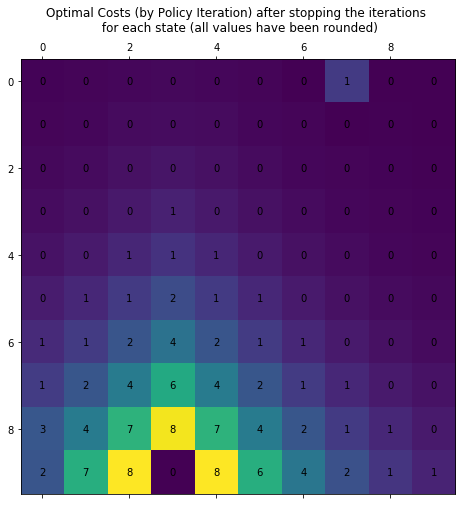

In [42]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(J,(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = int(np.floor(JN[j,i]))
        if c>=9:
            c=8
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal Costs (by Policy Iteration) after stopping the iterations \n for each state (all values have been rounded)')
plt.show()

### Explanation of policy obtained
Policy Iteration: All the actions around the Goal2 point into the goal.

None of the arrows point into Gray IN as it leads us far away from the goal.

All the actions point into Orange IN as it takes us closer towards Goal1

Note: In all the grids showing the actions and costs the values/actions plotted in Goals and  IN boxes are not valid as we cannot take action in that state.

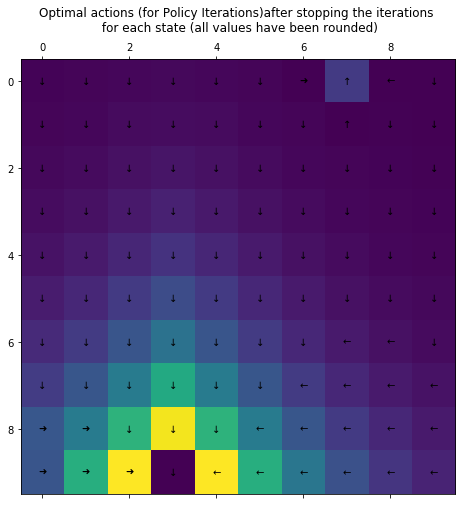

In [43]:
def create_action_matrix(action):
    arrow={0:'↑',1:'➜',2:'↓',3:'←'}
    arrow_arr=[]
    for i in range(10):
        for j in range(10):
            if action[i,j,0]==-1: # up
                arrow_arr.append(arrow[0])
            elif action[i,j,0]==1: #down
                arrow_arr.append(arrow[2])
            elif action[i,j,1]==-1: #left
                arrow_arr.append(arrow[3])
            elif action[i,j,1]==1: #right
                arrow_arr.append(arrow[1])
    return (np.reshape(arrow_arr,(10,10)))

act1=create_action_matrix(action)


# to print the arrows pointing along the optimal actions in that state
    
arrow_arr=np.reshape(np.array(act1),(10,10))
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
JN=np.reshape(np.array(J),(10,10))
ax.matshow(JN)
for i in range(10):
    for j in range(10):
        c = (act1[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.title('Optimal actions (for Policy Iterations)after stopping the iterations \n for each state (all values have been rounded)')
plt.show()




### Taxi

## Policy Iteration
In the given problem we have the following actions:
\begin{itemize}
\item Cruise the streets looking for a passenger.
\item Go to the nearest taxi stand and wait in line.
\item Wait for a call from the dispatcher (this is not possible in town B because of poor reception).
\end{itemize}

In [44]:
# transition probabilities
P_ij_A=np.array([[1/2,1/4,1/4],[1/16,3/4,3/16],[1/4,1/8,5/8]])
P_ij_B=np.array([[1/2,0,1/2],[1/16,7/8,1/16],[0,0,0]])
P_ij_C=np.array([[1/4,1/4,1/2],[1/8,3/4,1/8],[3/4,1/16,3/16]])

# reward matrix
R_ij_A=np.array([[10,4,8],[8,2,4],[4,6,4]])
R_ij_B=np.array([[14,0,18],[8,16,8],[0,0,0]])
R_ij_C=np.array([[10,2,8],[6,4,2],[4,0,8]])



In [45]:
P_ij_1=np.zeros((3,3))
P_ij_2=np.zeros((3,3))
P_ij_3=np.zeros((3,3))

# probability matrix for action 1
P_ij_1[0,:]=P_ij_A[0]
P_ij_1[1,:]=P_ij_B[0]
P_ij_1[2,:]=P_ij_C[0]

# probability matrix for action 2
P_ij_2[0,:]=P_ij_A[1]
P_ij_2[1,:]=P_ij_B[1]
P_ij_2[2,:]=P_ij_C[1]

# probability matrix for action 3
P_ij_3[0,:]=P_ij_A[2]
P_ij_3[1,:]=P_ij_B[2]
P_ij_3[2,:]=P_ij_C[2]


In [46]:
def find_single_stage_cost(P_ij,g_ij):
    #has to be evaluated for each state
    E_cost=P_ij*g_ij #expected cost of at the current stage for the action
    # will get a matrix which has to be summed over the 
    cost_summed=np.sum(E_cost,axis=1)
    return cost_summed #[cost(action1),cost(action2),cost(action3)]

In [47]:
g_A=find_single_stage_cost(P_ij_A,R_ij_A)
g_B=find_single_stage_cost(P_ij_B,R_ij_B)
g_C=find_single_stage_cost(P_ij_C,R_ij_C)

g=np.vstack((g_A,g_B))
g=np.vstack((g,g_C))
g=g.T

# cost vector for each action
g_1=g[0]
g_2=g[1]
g_3=g[2]

alpha=0.1
def get_J(alpha):
    # returns J for different values of alpha by using the closed form
    J_1=np.dot((np.linalg.inv(np.identity(3)-alpha*P_ij_1)),g_1)
    J_2=np.dot((np.linalg.inv(np.identity(3)-alpha*P_ij_2)),g_2)
    J_3=np.dot((np.linalg.inv(np.identity(3)-alpha*P_ij_3)),g_3)
    J=np.vstack((J_1,J_2))
    J=np.vstack((J,J_3))
    return J

In [48]:
alphas=np.arange(0,1,0.05)
arg_arr=[]
max_J_arr=[]
# loop for getting optimal costs for different values of J
for alpha in alphas:
    J=get_J(alpha)
    max_J=np.amax(J,axis=0)
    max_J_arr.append(max_J)
    arg=np.where(J==max_J)[0]
    arg_arr.append(arg)

In [49]:
J_max_df=pd.DataFrame(np.array(max_J_arr))
PI_max_df=pd.DataFrame(np.array(arg_arr)+1)
J_max_df['alpha']=alphas
PI_max_df['alpha']=alphas

In [50]:
J_max_df=J_max_df.rename(columns={'0': 'A', '1': 'B', '2': 'C'})
PI_max_df=PI_max_df.rename(columns={'0': 'A', '1': 'B', '2': 'C'})
J_max_df.columns=['A','B','C','alpha']
PI_max_df.columns=['A','B','C','alpha']
J_max_df=J_max_df[['alpha','A','B','C']]
PI_max_df=PI_max_df[['alpha','A','B','C']]



### Policy Iteration (Part 1):
Here the values of $\beta$ are varied from 0 to 0.95 with step size 0.05 and the optimal rewards and Optimal Actions are shown below:

Evident from the table, we can see that the optimal rewards increase as we increase the value of $\beta$ 

Also the optimal actions initially (for small $\beta$ ) is to take action:1, i.e.Cruise the streets looking for a passenger. And for large values of $\beta$ it is optimal to take action:2, i.e. Go to the nearest taxi stand and wait in line.

In [51]:
print('Optimal Costs obtained by Policy Iteration for each of the states for different values of alpha')
#print(J_max_df)
J_max_df

Optimal Costs obtained by Policy Iteration for each of the states for different values of alpha


,alpha,A,B,C
0,0.00,8.000000,16.000000,7.000000
1,0.05,8.511527,16.400260,7.498869
2,0.10,9.076506,16.856369,8.050865
3,0.15,9.704456,17.385855,8.665495
4,0.20,10.407268,18.377651,9.354637
5,0.25,11.200000,19.500414,10.133333
6,0.30,12.102002,20.782180,11.020921
7,0.35,13.138573,22.259614,12.042683
8,0.40,14.343434,23.981600,13.232323
9,0.45,15.762563,26.014797,14.635803


In [52]:
print('Optimal actions obtained by Policy Iteration for each of the states for different values of alpha')
#print(PI_max_df)
PI_max_df

Optimal actions obtained by Policy Iteration for each of the states for different values of alpha


,alpha,A,B,C
0,0.00,1,1,1
1,0.05,1,1,1
2,0.10,1,1,1
3,0.15,1,1,2
4,0.20,1,1,2
5,0.25,1,1,2
6,0.30,1,1,2
7,0.35,1,1,2
8,0.40,1,1,2
9,0.45,1,1,2


### Modified Policy Iteration

In [53]:
def MPI(mk,alpha,niter):
    '''
    Performs Modified Policy iteration
    mk: number of times the T_pi operator has to be applied
    alpha: discount factor
    niter number of times the policy iteration should run for
    '''
    action=[0,0,0] # inititialise with all action:1
    def give_probab_matrix(action):
        P=np.zeros((3,3))
        P[0,:]=P_ij_A[action[0],:]
        P[1,:]=P_ij_B[action[1],:]
        P[2,:]=P_ij_C[action[2],:]
        return P
    def get_single_stage_cost(action):
        g=np.zeros(3)
        g[0]=g_A[action[0]]
        g[1]=g_B[action[1]]
        g[2]=g_C[action[2]]
        return g
    J=np.zeros(3)
    J_arr=[] # to store J_max in each iter
    for i in range(niter):
        P=give_probab_matrix(action)
        g=get_single_stage_cost(action)
        for m in range(mk):
            #J=np.dot(np.linalg.inv((np.identity(3)-alpha*P)),g)
            J=g+alpha*np.dot(P,J)
        action=[0,0,0]
        g_1=get_single_stage_cost(action)
        P_1=give_probab_matrix(action)
        TJ_1=g_1+alpha*np.dot(P_1,J)

        action=[1,1,1]
        g_2=get_single_stage_cost(action)
        P_2=give_probab_matrix(action)
        TJ_2=g_2+alpha*np.dot(P_2,J)

        action=[2,2,2]
        g_3=get_single_stage_cost(action)
        P_3=give_probab_matrix(action)
        TJ_3=g_3+alpha*np.dot(P_3,J)

        TJ=np.dstack((TJ_1,TJ_2,TJ_3))
        J_max=np.max(TJ,axis=2)[0]
        J_arr.append(J_max)
        action=np.argmax(TJ,axis=2)[0]
    return J_arr,action

Choosing $m_k=5$ we get the optimal cost of $\\ A:121.6497741 \\ B:135.3025785 \\ C:122.83320606 \\$ and optimal actions $A:2 \\ B:2 \\ C:2$

Also the plot of $\delta_i=\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Modified Policy Iteration $(m_k=5)$ shows that the algorithm converges ($\delta_i<0.001$) after 20 iterations.

Choosing $m_k=5$ we get the optimal cost of $\\ A:121.65347112 \\ B:135.30627552 \\ C:122.83690308 \\$ and optimal actions $A:2 \\ B:2 \\ C:2$

Also the plot of $\delta_i=\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Modified Policy Iteration $(m_k=10)$ shows that the algorithm converges ($\delta_i<0.001$) after 11 iterations.

This shows that choosing $m_k=10$ is better than $m_k=5$ as we converge faster. This happens because we get a better approximate value of J in each iteration when we apply the $T_{\pi}$ operator $m_k$ times and thus leading to a better policy improvement step rather than doing the policy improvement step after the application of $T_{\pi}$ operator.

Also note that the optimal costs obtained with modified policy iteration almost match with the optimal costs in the table given before for $\beta=0.9$

Converged after 20 steps
Converged after 21 steps
Converged after 22 steps
Converged after 23 steps
Converged after 24 steps
Converged after 25 steps
Converged after 26 steps
Converged after 27 steps
Converged after 28 steps


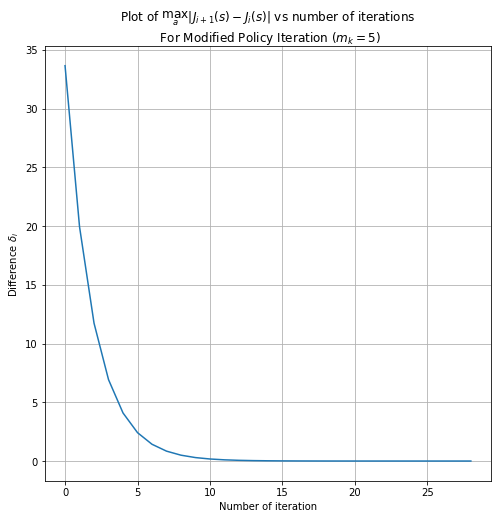

Optimal cost with Modified Policy iteration m_k=5 is:
[ 121.65345207  135.30625647  122.83688402]

Optimal actions with Modified Policy iteration m_k=5 is:
[2 2 2]

Converged after 11 steps
Converged after 12 steps
Converged after 13 steps
Converged after 14 steps
Converged after 15 steps
Converged after 16 steps
Converged after 17 steps
Converged after 18 steps
Converged after 19 steps
Converged after 20 steps
Converged after 21 steps
Converged after 22 steps
Converged after 23 steps
Converged after 24 steps
Converged after 25 steps
Converged after 26 steps
Converged after 27 steps
Converged after 28 steps


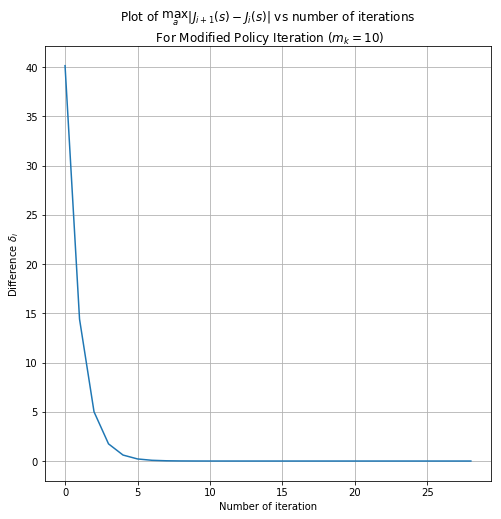

Optimal cost with Modified Policy iteration m_k=10 is:
[ 121.65347112  135.30627552  122.83690308]

 Optimal actions with Modified Policy iteration m_k=10 is:
[2 2 2]



In [54]:
delta=0.001
J_arr,actions=MPI(5,0.9,30)
diff=[]
for i in range(len(J_arr)-1):
    diff.append(np.max(np.abs(J_arr[i]-J_arr[i+1])))
    if diff[i]<delta:
        print('Converged after %d steps'%i)
plt.plot(diff)
plt.grid()
plt.title('Plot of $\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Modified Policy Iteration $(m_k=5)$')
plt.xlabel('Number of iteration')
plt.ylabel('Difference $\delta_i$')
plt.show()

print('Optimal cost with Modified Policy iteration m_k=5 is:')
print(J_arr[-1])
print('\nOptimal actions with Modified Policy iteration m_k=5 is:')
print(actions+1)
print()



J_arr1,actions1=MPI(10,0.9,30)
diff=[]
for i in range(len(J_arr)-1):
    diff.append(np.max(np.abs(J_arr1[i]-J_arr1[i+1])))
    if diff[i]<delta:
        print('Converged after %d steps'%i)
plt.plot(diff)
plt.grid()
plt.title('Plot of $\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Modified Policy Iteration $(m_k=10)$')
plt.xlabel('Number of iteration')
plt.ylabel('Difference $\delta_i$')
plt.show()

print('Optimal cost with Modified Policy iteration m_k=10 is:')
print(J_arr1[-1])
print('\n Optimal actions with Modified Policy iteration m_k=10 is:')
print(actions1+1)
print()




### Value Iteration 
We get the optimal cost of $\\ A:121.64997255 \\ B:135.3027769 \\ C:122.8334045 \\$ and optimal actions $A:2 \\ B:2 \\ C:2$

Also the plot of $\delta_i=\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Value Policy Iteration shows that the algorithm converges ($\delta_i<0.001$) after 60 iterations.

Also note that the optimal costs obtained with value iteration almost match with the optimal costs in the table given before for $\beta=0.9$

##################################################
Starting Value Iteration


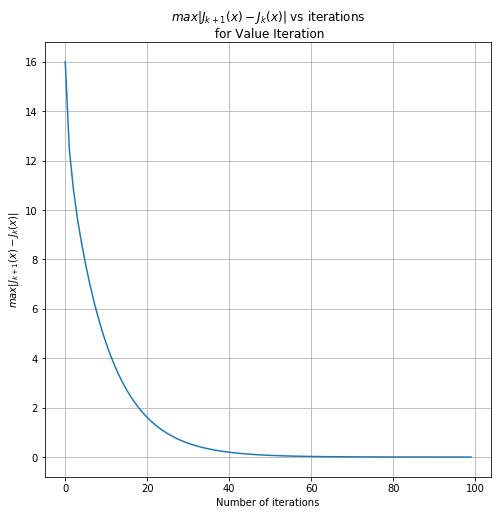

The optimal action obtained from Value iteration after 100 iterations is: 
 [2 2 2]
The optimal value obtained from Value iteration after 100 iterations is: 
 [ 121.64997255  135.30277695  122.8334045 ]


In [55]:
print('#'*50)
print('Starting Value Iteration')
N=100
J_k_arr=[] # to store the cost to go at each stage
J_k_arr.append([0,0,0]) #array to store J in each stage

g_A=find_single_stage_cost(P_ij_A,R_ij_A)
g_B=find_single_stage_cost(P_ij_B,R_ij_B)
g_C=find_single_stage_cost(P_ij_C,R_ij_C)

beta=0.9
actions_arr=[] #array to store actions optimal actions in each stage for each state
#actions_arr.append([np.argmax(g_A),np.argmax(g_B),np.argmax(g_C)])

for i in range(N):
    #print(J_k_arr[i])
    A_arr=g_A+[beta*np.dot(J_k_arr[i],P_ij_A[0]),beta*np.dot(J_k_arr[i],P_ij_A[1]),beta*np.dot(J_k_arr[i],P_ij_A[2])]
    B_arr=g_B+[beta*np.dot(J_k_arr[i],P_ij_B[0]),beta*np.dot(J_k_arr[i],P_ij_B[1]),beta*np.dot(J_k_arr[i],P_ij_B[2])]
    C_arr=g_C+[beta*np.dot(J_k_arr[i],P_ij_C[0]),beta*np.dot(J_k_arr[i],P_ij_C[1]),beta*np.dot(J_k_arr[i],P_ij_C[2])]
    J_A=np.max(A_arr) #max function over the actions
    action_A=np.argmax(A_arr)
    J_B=np.max(B_arr) #max function over the actions
    action_B=np.argmax(B_arr)
    J_C=np.max(C_arr) #max function over the actions
    action_C=np.argmax(C_arr)
    J_k_arr.append([J_A,J_B,J_C])
    actions_arr.append([action_A,action_B,action_C])

max_arr=[]
i_arr=[]
for i in range(len(J_k_arr)-1):
    J_temp=np.array(J_k_arr[i])
    J_temp_1=np.array(J_k_arr[i+1])
    max_arr.append(np.max(J_temp_1-J_temp))
    i_arr.append(i)
plt.plot(i_arr,max_arr)
plt.grid()
plt.title('$max|J_{k+1}(x)-J_k(x)|$ vs iterations \n for Value Iteration')
plt.xlabel('Number of iterations')
plt.ylabel('$max|J_{k+1}(x)-J_k(x)|$')
plt.show()

print('The optimal action obtained from Value iteration after 100 iterations is: \n',np.array(actions_arr)[-1]+1)    
print('The optimal value obtained from Value iteration after 100 iterations is: \n',np.array(J_k_arr)[-1])    

### Gauss Seidel Value Iteration

We get the optimal cost of $\\ A:120.6536124 \\ B:134.15900833 \\ C:121.83416938 \\$ and optimal actions $A:2 \\ B:2 \\ C:2$

Also the plot of $\delta_i=\max_a | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Gauss Seidel Value Policy Iteration shows that the algorithm converges ($\delta_i<0.001$) after around 60 iterations. The jitter is due to the stochastic nature of the algorithm for choosing the states.

Also note that the optimal costs obtained with Gauss Seidel value iteration almost match with the optimal costs in the table given before for $\beta=0.9$

##################################################
Starting Gauss Seidel Value Iteration


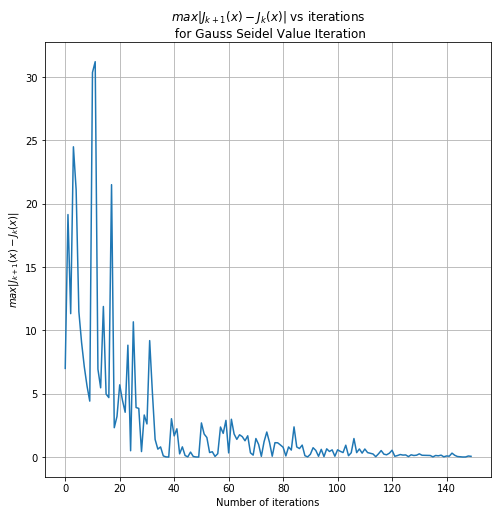

The optimal action obtained from Value iteration after 100 iterations is: 
 [2 2 2]
The optimal value obtained from Value iteration after 100 iterations is: 
 [ 121.08398884  134.6711394   122.21113685]


In [56]:
print('#'*50)
print('Starting Gauss Seidel Value Iteration')

N=150
J_k_arr=[] # to store the cost to go at each stage
J_k_arr.append([0,0,0]) #array to store J in each stage

g_A=find_single_stage_cost(P_ij_A,R_ij_A)
g_B=find_single_stage_cost(P_ij_B,R_ij_B)
g_C=find_single_stage_cost(P_ij_C,R_ij_C)

beta=0.9
actions_arr=[] #array to store actions optimal actions in each stage for each state
actions_arr.append([0,0,0])
#actions_arr.append([np.argmax(g_A),np.argmax(g_B),np.argmax(g_C)])

for i in range(N):
    #print(J_k_arr[i])
    A_arr=g_A+[beta*np.dot(J_k_arr[i],P_ij_A[0]),beta*np.dot(J_k_arr[i],P_ij_A[1]),beta*np.dot(J_k_arr[i],P_ij_A[2])]
    B_arr=g_B+[beta*np.dot(J_k_arr[i],P_ij_B[0]),beta*np.dot(J_k_arr[i],P_ij_B[1]),beta*np.dot(J_k_arr[i],P_ij_B[2])]
    C_arr=g_C+[beta*np.dot(J_k_arr[i],P_ij_C[0]),beta*np.dot(J_k_arr[i],P_ij_C[1]),beta*np.dot(J_k_arr[i],P_ij_C[2])]
    choose=np.random.randint(0,3,1) # to choose one of the states to change randomly
    # to perform Gauss Seidel Value Iteration we need choose one state to update randomly
    if choose==0:
        J_A=np.max(A_arr) #max function over the actions
        action_A=np.argmax(A_arr)
        J_B=J_k_arr[i][1]
        action_B=actions_arr[i][1]
        J_C=J_k_arr[i][2]
        action_C=actions_arr[i][2]
    if choose==1:
        J_B=np.max(B_arr) #max function over the actions
        action_B=np.argmax(B_arr)
        J_A=J_k_arr[i][0]
        action_A=actions_arr[i][0]
        J_C=J_k_arr[i][2]
        action_C=actions_arr[i][2]
    if choose==2:
        J_C=np.max(C_arr) #max function over the actions
        action_C=np.argmax(C_arr)
        J_B=J_k_arr[i][1]
        action_B=actions_arr[i][1]
        J_A=J_k_arr[i][0]
        action_A=actions_arr[i][0]
    J_k_arr.append([J_A,J_B,J_C])
    actions_arr.append([action_A,action_B,action_C])

max_arr=[]
i_arr=[]
for i in range(len(J_k_arr)-1):
    J_temp=np.array(J_k_arr[i])
    J_temp_1=np.array(J_k_arr[i+1])
    max_arr.append(np.max(J_temp_1-J_temp))
    i_arr.append(i)
plt.plot(i_arr,max_arr)
plt.grid()
plt.title('$max|J_{k+1}(x)-J_k(x)|$ vs iterations \n for Gauss Seidel Value Iteration')
plt.xlabel('Number of iterations')
plt.ylabel('$max|J_{k+1}(x)-J_k(x)|$')
plt.show()

print('The optimal action obtained from Value iteration after 100 iterations is: \n',np.array(actions_arr)[-1]+1)    
print('The optimal value obtained from Value iteration after 100 iterations is: \n',np.array(J_k_arr)[-1])    